In [73]:
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [49]:
from sklearn.datasets import load_breast_cancer

In [50]:
cancer=load_breast_cancer()

In [51]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [52]:
type(cancer['data'])

numpy.ndarray

In [53]:
##convert to dataframe
data=pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns=np.append(cancer['feature_names'],'target'))

In [54]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [55]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

## the the count of each class in the target

In [56]:
data.groupby('target').size()
#data.target.value_counts()


target
0.0    212
1.0    357
dtype: int64

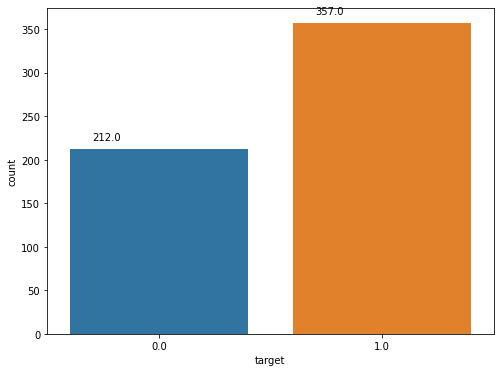

In [57]:
fig, ax = plt.subplots(figsize=(8, 6))
ax=sns.countplot(data['target'],label='count')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+10))


In [58]:
print(data.dtypes)

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

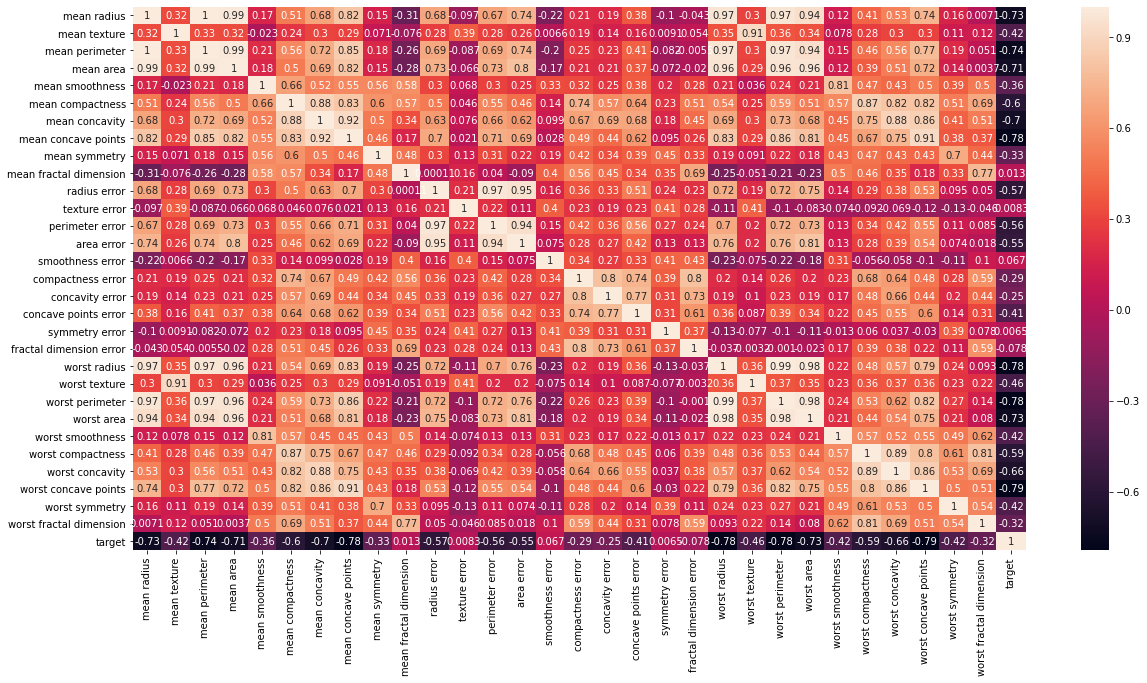

In [59]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [135]:
x=data.drop('target',axis=1)
y=data['target']

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25)

In [154]:
#scale the data
scaler = MinMaxScaler()
train_x = scaler.fit_transform(x_train)
test_x = scaler.fit_transform(x_test)


accuracy 0.9790209790209791


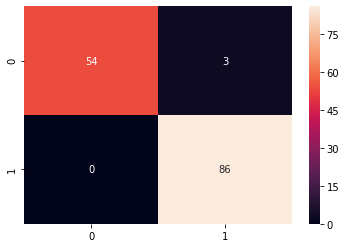

In [75]:
svc_model=SVC()
svc_model.fit(train_x,y_train)
y_predicted=svc_model.predict(test_x)
cm=confusion_matrix(y_test,y_predicted)
sns.heatmap(cm,annot=True)
print('accuracy',accuracy_score(y_test, y_predicted))

In [65]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        57
         1.0       0.97      1.00      0.98        86

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



In [69]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

accuracy 0.986013986013986


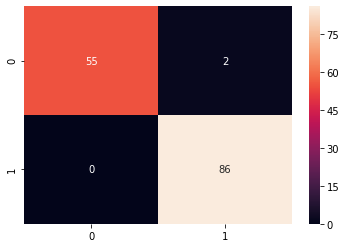

In [76]:
svc_model=SVC()
svc_model.fit(scaled_x_train,y_train)
y_predicted=svc_model.predict(scaled_x_test)
cm=confusion_matrix(y_test,y_predicted)
sns.heatmap(cm,annot=True)


## tuning svm paramters

In [198]:
from sklearn.model_selection import GridSearchCV

In [194]:
param_grid={'C':[.1,1,10,100],'gamma':[1,.1,.01,.001],'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(train_x,y_train)

grid_predicted=grid.predict(test_x)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.915, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.951, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.944, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.838, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.901, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.887, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.887, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.634, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.634, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.634, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.944, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.979, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.979, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished


In [197]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        56
         1.0       0.99      0.98      0.98        87

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

accuracy 0.9790209790209791


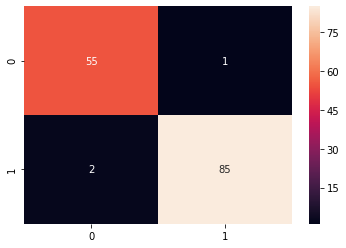

In [196]:
cm=confusion_matrix(y_test,grid_predicted)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,grid_predicted))
print('accuracy',accuracy_score(y_test, grid_predicted))

### feature selection techniques

In [77]:


#Import the libraries
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from numpy import sort
from sklearn.feature_selection import SelectFromModel

In [151]:
# define custom class to fix bug in xgboost 1.0.2
class MyXGBClassifier(XGBClassifier):
	@property
	def coef_(self):
		return None
 

In [172]:

xgb_model = MyXGBClassifier(max_depth=5, learning_rate=0.08, n_jobs=-1).fit(train_x, y_train)

thresholds = sort(xgb_model.feature_importances_)
thresholds

array([0.        , 0.        , 0.00265297, 0.00323601, 0.00447167,
       0.00680299, 0.00680626, 0.00691165, 0.0071229 , 0.00720493,
       0.00821313, 0.00877751, 0.00994412, 0.01048211, 0.01268003,
       0.01475516, 0.01513801, 0.0157982 , 0.01804547, 0.0182962 ,
       0.01860217, 0.0218242 , 0.02297229, 0.02428082, 0.03421935,
       0.04306471, 0.04773366, 0.07646041, 0.19708285, 0.3364202 ],
      dtype=float32)

In [177]:
max=0


for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb_model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(train_x)
    #print(x.columns[selection.get_support()])
    #print(select_X_train)
# train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(test_x)
    
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    if accuracy>max:
        max=accuracy
        d=x.columns[selection.get_support()]
        
print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, len(d), max*100.0))
d
                
    

Thresh=0.336, n=11, Accuracy: 97.20%


Index(['mean texture', 'mean area', 'mean concavity', 'mean concave points',
       'area error', 'concave points error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst concave points'],
      dtype='object')

In [180]:
rf_model =RandomForestClassifier(n_estimators=c-1,n_jobs=-1,random_state=seed).fit(train_x, y_train)

thresholds = sort(rf_model.feature_importances_)
thresholds

array([0.0017253 , 0.00195769, 0.00249055, 0.00298483, 0.00317501,
       0.00334918, 0.00378358, 0.00461661, 0.00531234, 0.0061169 ,
       0.00621613, 0.00659994, 0.00674402, 0.008847  , 0.01157679,
       0.01597099, 0.01911597, 0.02775965, 0.02849667, 0.03261041,
       0.0330312 , 0.03445356, 0.03777061, 0.03898406, 0.06346112,
       0.06956092, 0.09065743, 0.10462608, 0.10939169, 0.21861378])

In [181]:
max=0
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(rf_model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(train_x)
    #print(x.columns[selection.get_support()])
    #print(select_X_train)
# train model
    selection_model = RandomForestClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(test_x)
    
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    
    if accuracy>max:
        max=accuracy
        d=x.columns[selection.get_support()]
        
print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, len(d), max*100.0))
d
                
    

Thresh=0.219, n=26, Accuracy: 97.90%


Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean fractal dimension', 'radius error',
       'perimeter error', 'area error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [182]:
gb=GradientBoostingClassifier(n_estimators=c-1,random_state=seed).fit(train_x, y_train)

thresholds = sort(gb.feature_importances_)
thresholds

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.17469807e-05, 1.42620431e-04, 3.37768433e-04, 3.93817750e-04,
       8.39231850e-04, 9.33589349e-04, 1.99912709e-03, 2.53915841e-03,
       2.84063927e-03, 2.98675282e-03, 3.06271877e-03, 3.44401156e-03,
       3.64837878e-03, 3.83775214e-03, 5.59422906e-03, 6.15234320e-03,
       7.97388607e-03, 9.54237573e-03, 2.14591197e-02, 4.28011403e-02,
       4.43184236e-02, 5.56652551e-02, 8.41460159e-02, 1.23215215e-01,
       2.21825666e-01, 3.50209017e-01])

In [184]:
max=0
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(gb, threshold=thresh, prefit=True)
    select_X_train = selection.transform(train_x)
    #print(x.columns[selection.get_support()])
    #print(select_X_train)
# train model
    selection_model = GradientBoostingClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(test_x)
    
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    if accuracy>max:
        max=accuracy
        d=x.columns[selection.get_support()]
        
print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, len(d), max*100.0))
d

Thresh=0.350, n=30, Accuracy: 97.20%


Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')